## height-weight dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Read the dataset
df=pd.read_csv('D:/Dataset/height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

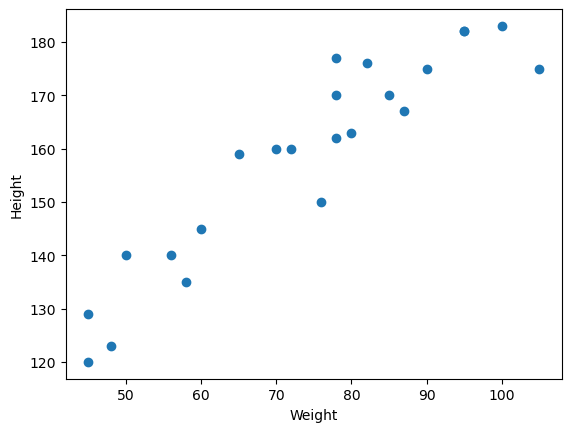

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [5]:
## Divide the dataset into independent and dependent features
X=df[['Weight']] ## Independent feature
y=df[['Height']] ## Dependent feature

In [6]:
## Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [7]:
X.shape

(23, 1)

In [8]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((18, 1), (18, 1), (5, 1), (5, 1))

In [9]:
## Standardization the dataset (Train Independent data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

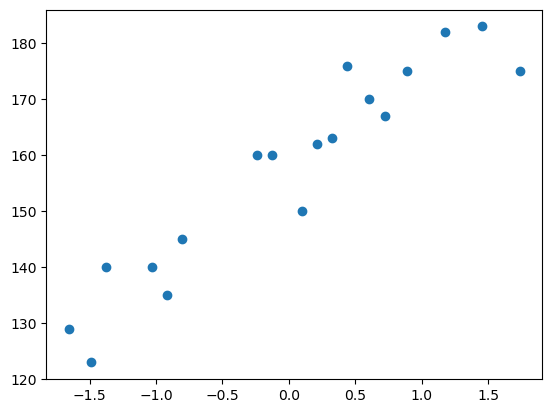

In [10]:
plt.scatter(X_train,y_train)

The slope or coefficient of weight is :: [[17.03440872]]
Intercept :: [157.5]


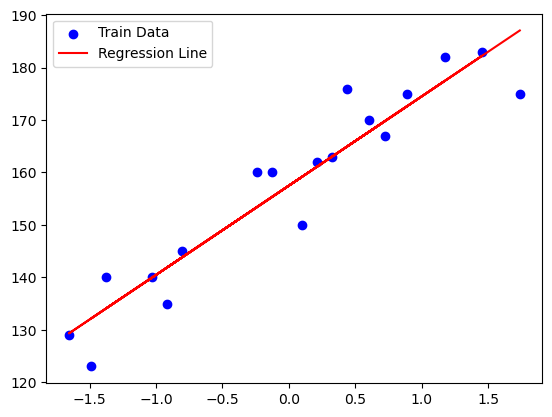

In [11]:
## Train the Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print("The slope or coefficient of weight is ::",regressor.coef_)
print("Intercept ::",regressor.intercept_)
plt.scatter(X_train,y_train,color='blue', label='Train Data')
## Draw the Best fit line
plt.plot(X_train,regressor.predict(X_train),color='red', label='Regression Line')
plt.legend()
plt.show()

## Prediction of the train data
1. Predicted height output = intercept + coef_(weight)

2. y_pred_train = 157.5 + 17.03(X_train)

## Prediction of the test data
1. predicted height output = intercept + coef_(weight)

2. y_pred_test = 157.5 + 17.03(X_test)

In [12]:
y_pred_test = regressor.predict(X_test)
y_pred_test,y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

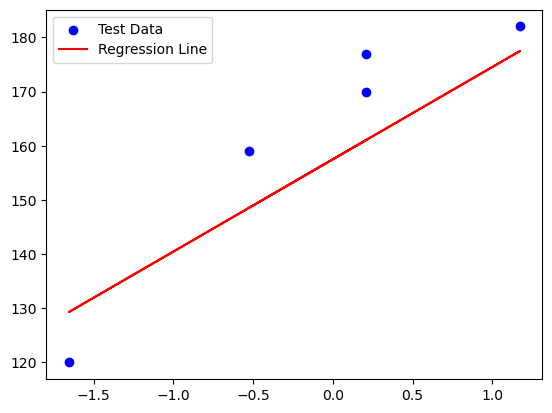

In [13]:
plt.scatter(X_test, y_test, color='blue', label='Test Data')
# Best fit Line for predictions
plt.plot(X_test, regressor.predict(X_test), color='red', label='Regression Line')  
plt.legend()
plt.show()

In [14]:
## Performance Metrices
## MSE, MAE,RMSE
## R Square and Adjusted R Square
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print("Mean Squared Error ::",mse)
print("Mean Absolute Error ::",mae)
print("Root Mean Squared Error ::",rmse)

Mean Squared Error :: 109.77592599051654
Mean Absolute Error :: 9.822657814519227
Root Mean Squared Error :: 10.477400726827076


## R Squared Formula ::
R^2 = 1- SSR/SST

R^2 = coefficient of determination 

SSR = Sum of squares of residuals

SST = Total sum of squares

In [15]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)
score

0.7769869860423441

## Adjusted R2 = 1 -[(1-R2)*(n-1)/(n-k-1)]

Where:

R2 :: The R2 of the model

n :: The number of Observation

k :: The number of predictor variables


In [16]:
## Display adjusted R - Squared
1 - (1-score)*(len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

0.7026493147231254

In [17]:
regressor

LinearRegression()

In [20]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X_train is the training dataset
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler to the training data

# Transform the new data point
scaled_weight = scaler.transform([[80]])

# Predict using the trained regressor
height_prediction = regressor.predict(scaled_weight)
print("The height prediction for weight 80 kg is ::", height_prediction[0])

The height prediction for weight 80 kg is :: [1520.25269753]


## Assumption

In [21]:
## Scatterplot for Prediction
## Residuals
residuals = y_test - y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


C:\Users\user\AppData\Local\Temp\ipykernel_13200\257522367.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde = True)


<Axes: ylabel='Density'>

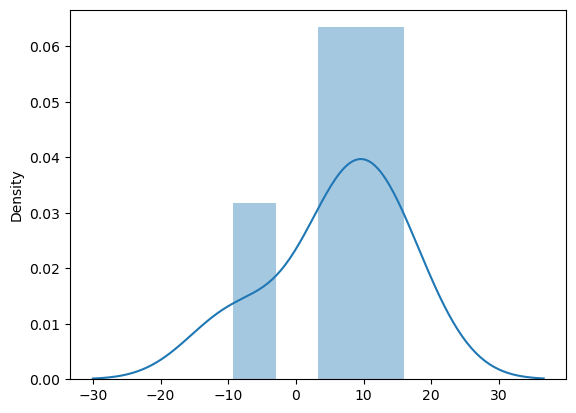

In [22]:
## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde = True)